<a href="https://colab.research.google.com/github/mbabar1100/AIandMLforDiseaseDetection/blob/main/LeveragingAIForPresumptiveTuberculosis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Leveraging AI for Early Identification of Presumptive TB Cases from Rural Patient Records**


#### **Introduction**

Tuberculosis (TB) remains one of the leading causes of death worldwide, particularly in low-resource settings such as rural areas. Early detection is essential for controlling the spread of the disease, but in many rural areas, limited access to healthcare resources and diagnostic tools hinders timely diagnosis. Leveraging Artificial Intelligence (AI) for early identification of presumptive TB cases in rural patient records offers a promising solution to improve diagnosis and treatment outcomes. This approach can significantly enhance the efficiency of TB detection by analyzing patient data and providing actionable insights to healthcare workers.

#### **The Problem**

In rural settings, healthcare facilities often lack advanced diagnostic tools such as radiographic imaging, molecular diagnostics (e.g., PCR testing), or even sufficient healthcare workers to manually review patient records. As a result, many TB cases go undiagnosed, leading to delayed treatments, worsening health conditions, and a greater risk of transmission. Traditional diagnostic methods, like chest X-rays or sputum microscopy, are time-consuming and costly, which makes them inaccessible in resource-limited settings.

#### **AI’s Role in Early Detection of TB**

AI, specifically machine learning (ML) and data analytics, can play a pivotal role in identifying presumptive TB cases in rural regions. By analyzing historical and real-time patient data, AI models can quickly and accurately flag individuals who show symptoms associated with TB. The process is efficient, less resource-intensive, and scalable, making it ideal for rural settings. AI systems can process large volumes of patient records, extract relevant features such as age, gender, symptoms (e.g., cough, weight loss, fever), and diagnostic results, and provide clinicians with predictive insights for early intervention.

#### **Key Features in Rural Patient Records**

Rural patient records typically contain a mix of structured and unstructured data. These records often include demographic information, clinical symptoms, previous medical history, and diagnostic results. Key features that AI can analyze to predict TB cases include:

- **Demographic Information**: Age, gender, and medical history (e.g., diabetes or smoking) are important indicators.
- **Clinical Symptoms**: Cough, sputum production, night sweats, fever, unexplained weight loss, and fatigue are common symptoms of TB.
- **Contact History**: A history of exposure to known TB patients significantly increases the likelihood of developing the disease.
- **Diagnostic Results**: Sputum microscopy, X-ray results, and molecular tests (e.g., Xpert MTB/RIF) are crucial for diagnosing TB. AI can help interpret and flag abnormal results.

#### **Machine Learning Models for TB Detection**

AI models use historical patient data to identify patterns in features such as symptoms, lab results, and risk factors associated with TB. These models can be trained using machine learning algorithms like:

- **Logistic Regression**: A simple yet effective model for binary classification tasks (e.g., TB vs. non-TB).
- **Random Forest and Gradient Boosting**: These ensemble methods are useful for capturing complex relationships between features and the likelihood of a TB diagnosis.
- **Support Vector Machines (SVM)**: SVMs can help classify patients by learning the hyperplane that separates TB-positive and non-TB cases.
- **Neural Networks**: For more complex data, deep learning models (e.g., CNNs for X-ray images) can be used for feature extraction and classification.

#### **Steps in the AI Process for TB Detection**

1. **Data Collection**: The first step is collecting patient records from rural healthcare facilities. These records may include clinical notes, medical history, lab results, and demographic information. Standardizing and cleaning the data ensures accuracy.
   
2. **Feature Extraction**: Relevant features like symptoms (cough, sputum production), diagnostic results (X-ray, microscopy), and demographic data are extracted. Natural Language Processing (NLP) can be applied to analyze unstructured text, such as clinical notes.

3. **Model Training**: Machine learning models are trained using labeled datasets (where the presence or absence of TB is known). These models learn to identify patterns that indicate a high likelihood of TB based on the available features.

4. **Model Evaluation**: The model's performance is evaluated using metrics like accuracy, precision, recall, and ROC AUC. The goal is to minimize false negatives (missed TB cases) and false positives (unnecessary treatments).

5. **Deployment**: Once trained, the model can be deployed in rural clinics, where healthcare workers can input patient data, and the system will flag potential TB cases. The model can also prioritize cases based on the severity of symptoms or diagnostic results.

#### **Advantages of AI in Rural TB Detection**

- **Increased Efficiency**: AI can analyze large datasets faster than human clinicians, helping to prioritize high-risk patients for further diagnostic testing.
- **Cost-Effectiveness**: AI tools can be more affordable than traditional diagnostic tools and can work in low-resource settings where diagnostic tests may be scarce.
- **Scalability**: AI models can be easily scaled to handle data from multiple rural clinics or regions, helping to identify TB cases across large populations.
- **Real-Time Decision Support**: AI systems can provide immediate feedback, guiding healthcare workers on whether further investigation or treatment is needed.

#### **Challenges and Considerations**

While AI presents a transformative opportunity, there are several challenges to its implementation:

- **Data Quality and Availability**: Data from rural settings may be incomplete or inconsistent. Handling missing data and ensuring the data is representative is crucial.
- **Training Data**: Sufficient labeled data (positive and negative TB cases) is needed to train machine learning models effectively. This may require collaboration with local health authorities or NGOs.
- **Integration with Existing Systems**: AI tools must integrate seamlessly with current healthcare systems in rural areas, where infrastructure may be outdated.
- **Ethical and Privacy Concerns**: Ensuring patient data privacy and obtaining informed consent is essential when using AI for healthcare applications.

#### **Conclusion**

AI offers a powerful tool for the early identification of presumptive TB cases in rural settings. By analyzing patient data quickly and accurately, AI can assist healthcare providers in making timely decisions, reducing diagnostic delays, and improving TB treatment outcomes. However, careful consideration must be given to data quality, ethical concerns, and integration with existing healthcare infrastructure. As technology continues to advance, AI has the potential to revolutionize TB detection and control, particularly in resource-limited areas where the burden of the disease is most significant.

Step 1: Import Required Libraries


In [28]:
# Step 1: Loading Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.compose import ColumnTransformer
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import warnings

warnings.filterwarnings('ignore')  # Ignore warnings during model training


Step 2: Load Data
Here, we load the dataset and ensure that the column names are stripped of any leading/trailing spaces.

In [30]:
# Step 2: Loading Data with File Upload
from google.colab import files

# Upload the file from local machine
uploaded = files.upload()

# After uploading, load the dataset (the filename will be the one you uploaded)
df = pd.read_csv(list(uploaded.keys())[0], encoding='ISO-8859-1')  # Load dataset

# Strip extra spaces from column names
df.columns = df.columns.str.strip()

# Display the first few rows to understand the dataset
print(df.head())

# Check for missing values
print(df.isnull().sum())


Saving CampTBCasesDataFinal.csv to CampTBCasesDataFinal.csv
      CampName      City            Province               Address  Gender  \
0   Khaki Camp  Mansehra  Khyber Pakhtunkhwa   Khaki camp Mansehra  Female   
1  Brarri Camp  Mansehra  Khyber Pakhtunkhwa  Brarri Camp Mansehra  Female   
2  Brarri camp  Mansehra  Khyber Pakhtunkhwa  Brarri Camp Mansehra  Female   
3   Khaki Camp  Mansehra  Khyber Pakhtunkhwa   Khaki camp Mansehra    Male   
4   Khaki Camp  Mansehra  Khyber Pakhtunkhwa   Khaki camp Mansehra  Female   

    Age Cough ProductionOfSputum NightSweat BloodStreakedSputum  ...  \
0  46.0   Yes                Yes         No                  No  ...   
1  50.0   Yes                Yes         No                  No  ...   
2  50.0   Yes                Yes         No                  No  ...   
3   5.0   Yes                Yes         No                  No  ...   
4  22.0   Yes                Yes         No                  No  ...   

       XRay BPositiveOrBNegative   Sit

Step 2: Loading Data
In this step, we load the dataset from a CSV file and perform initial checks, such as handling missing values and ensuring correct data types.

Step 3: Data Preprocessing
Here we handle missing values, convert categorical features to numeric, and handle any other required preprocessing (like dealing with dates).

Step 3: Exploratory Data Analysis (EDA)
We perform some basic exploratory data analysis to understand the distribution of the data.

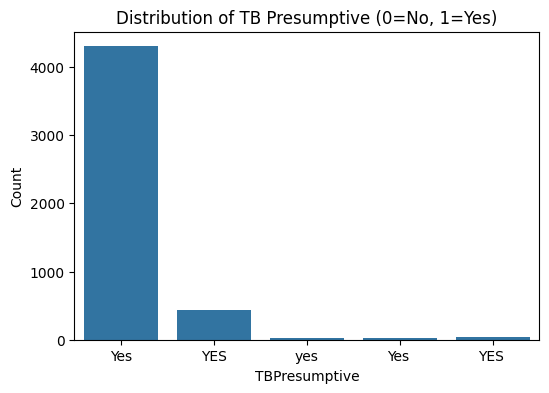

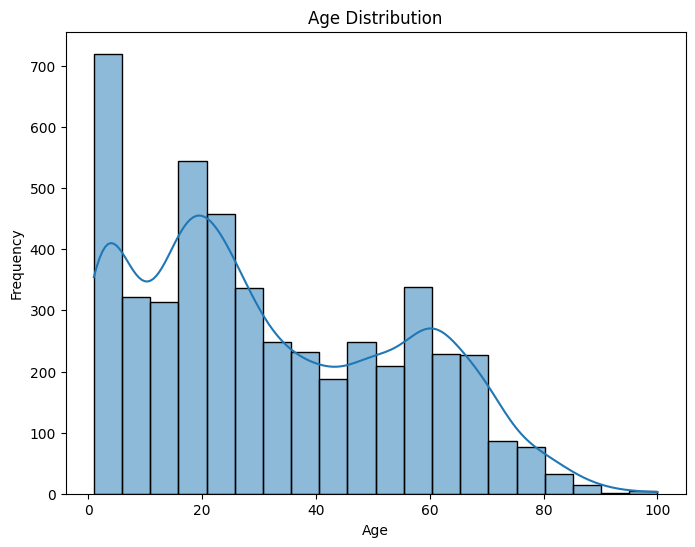

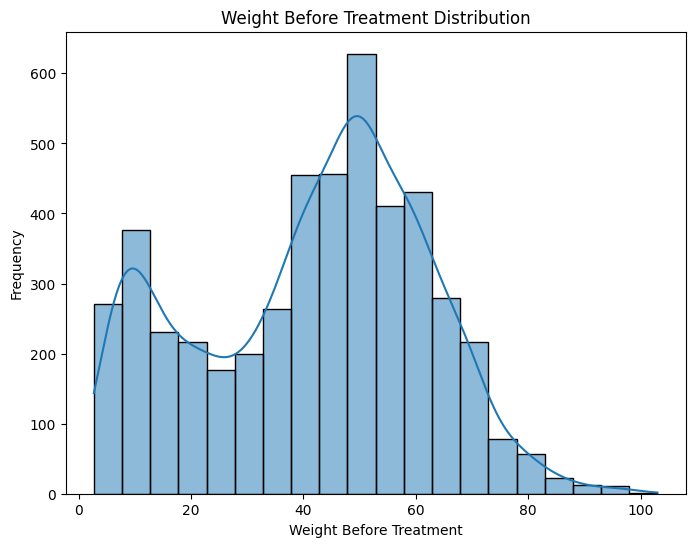

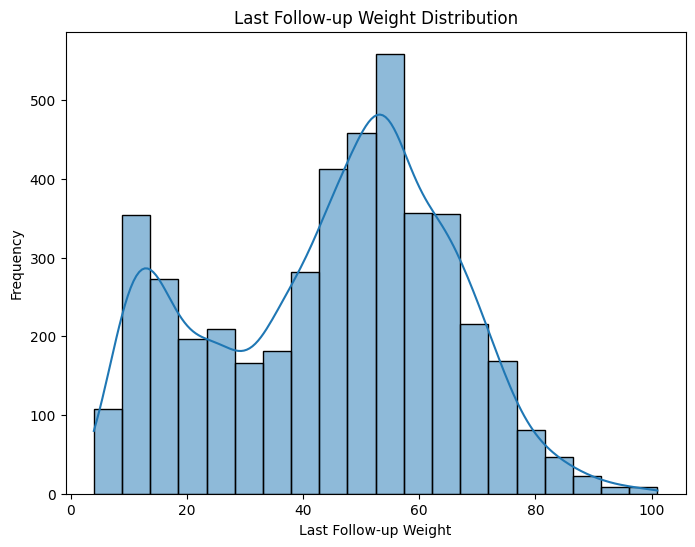

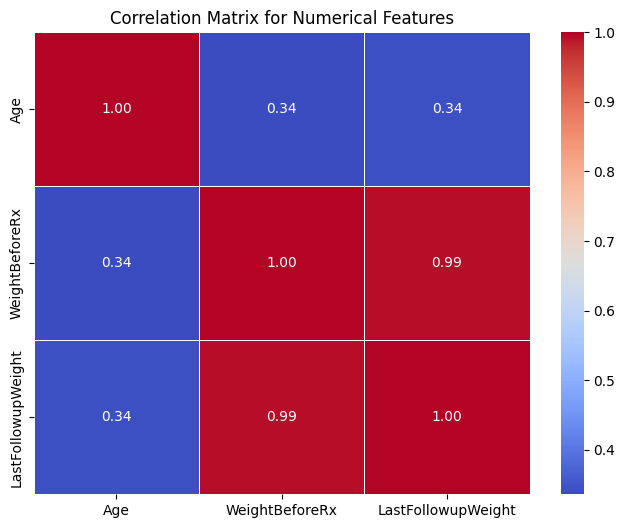

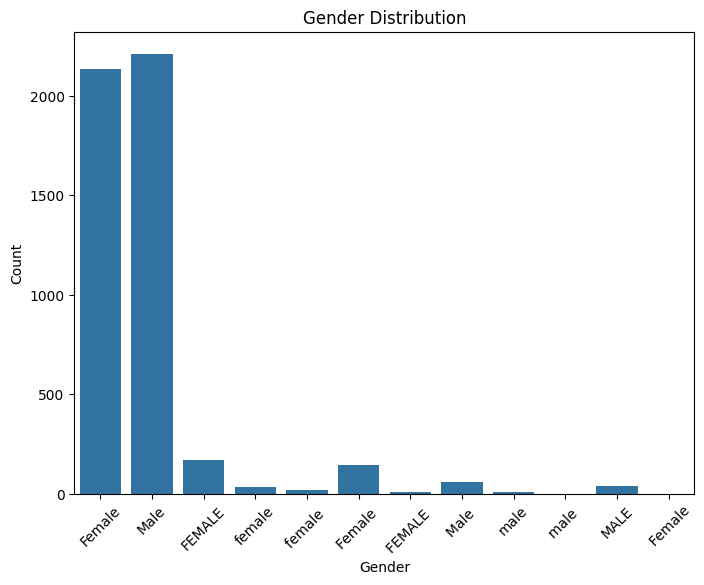

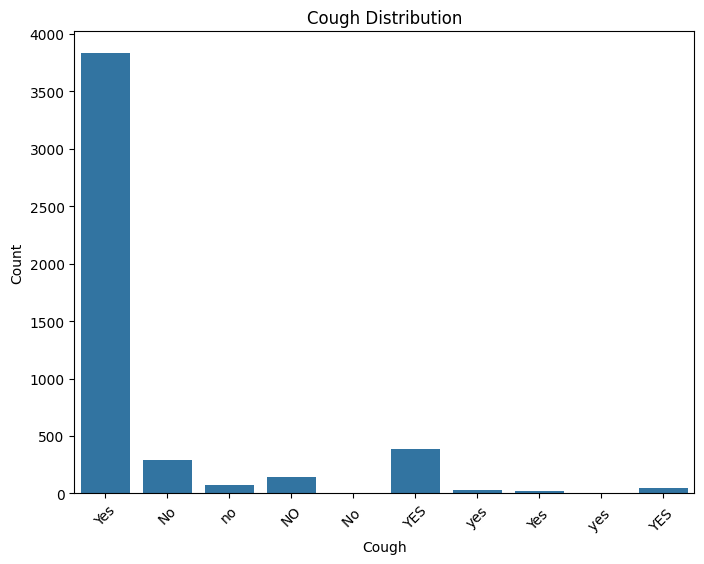

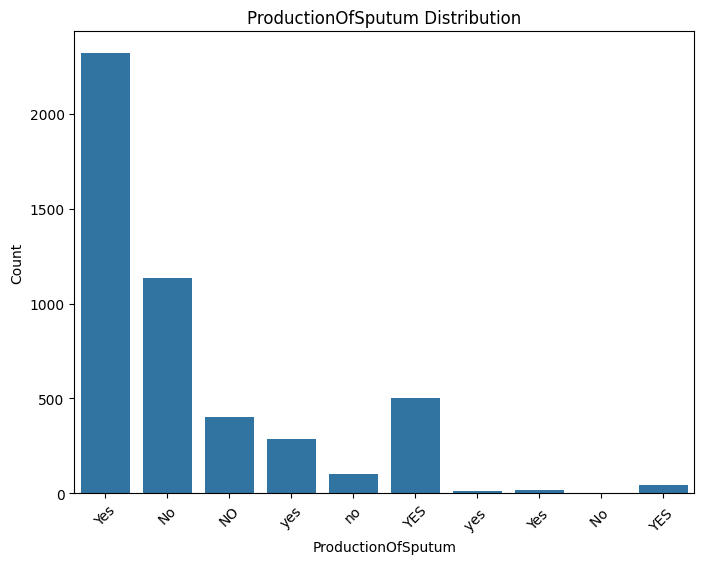

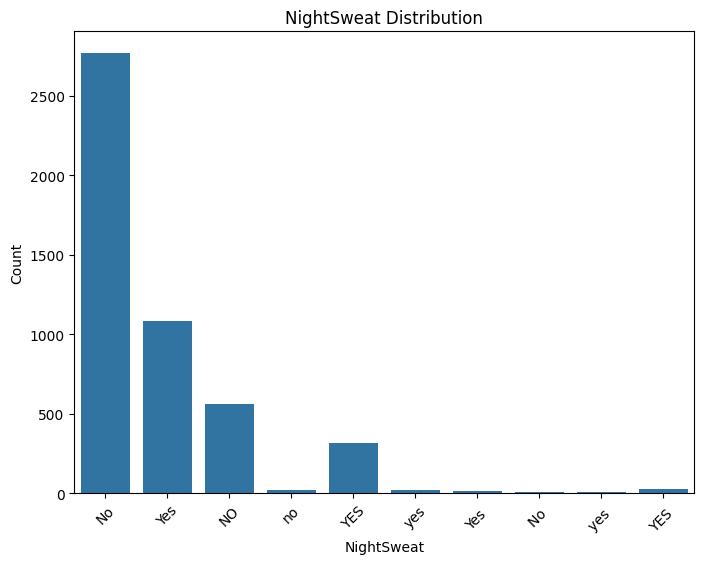

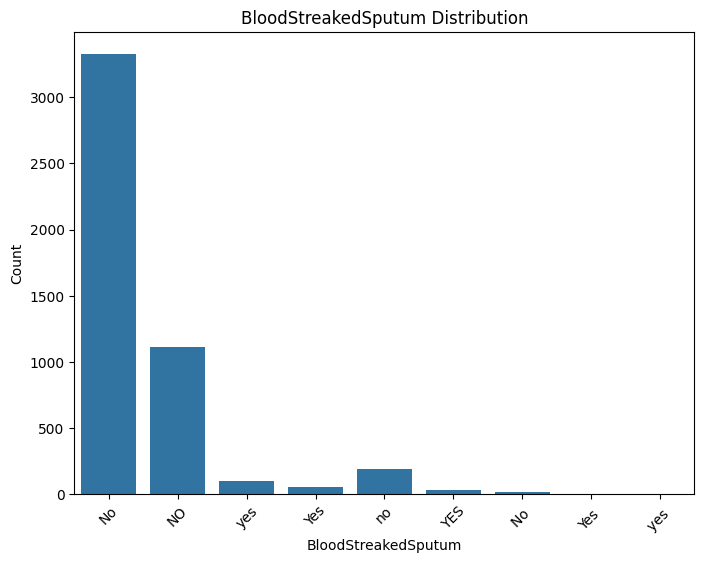

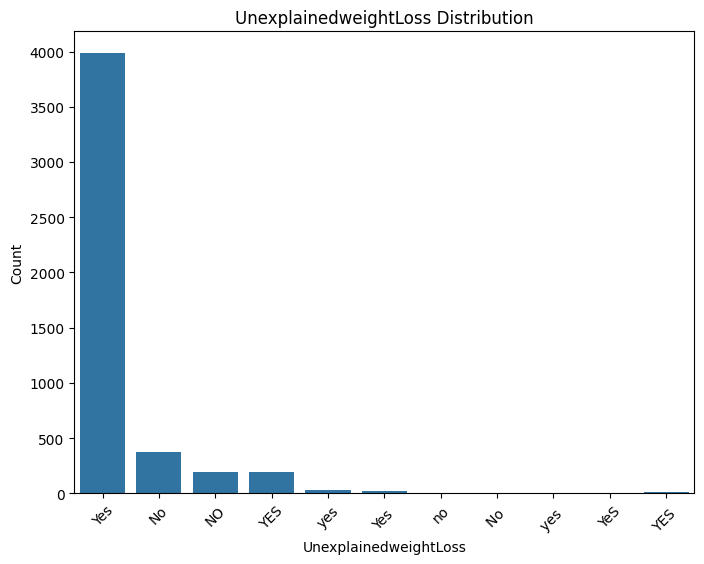

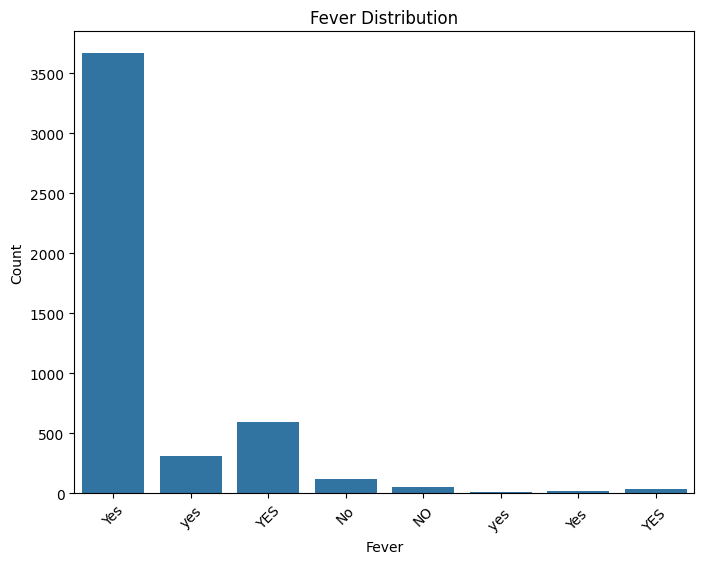

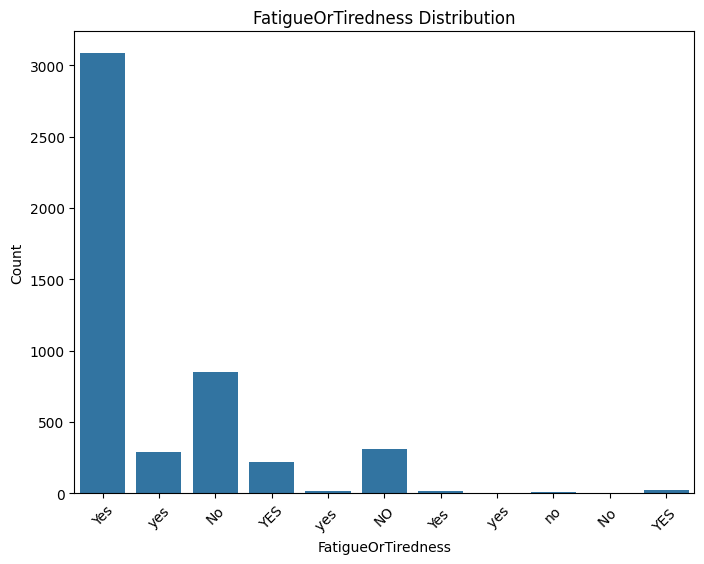

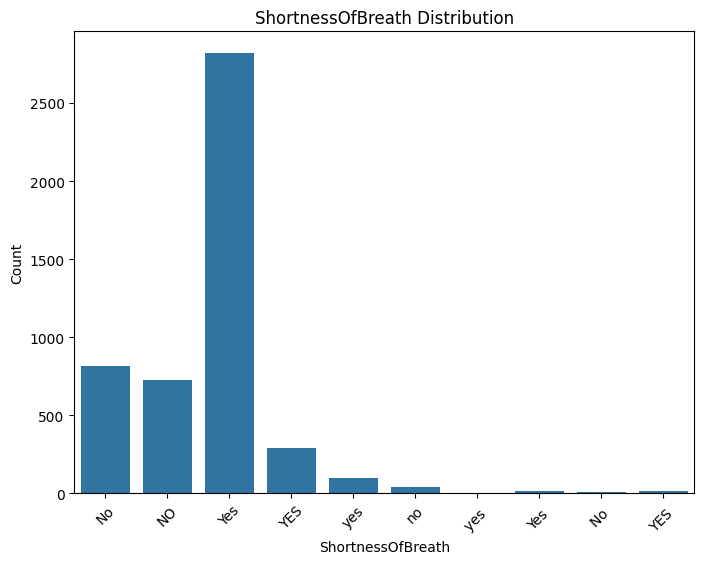

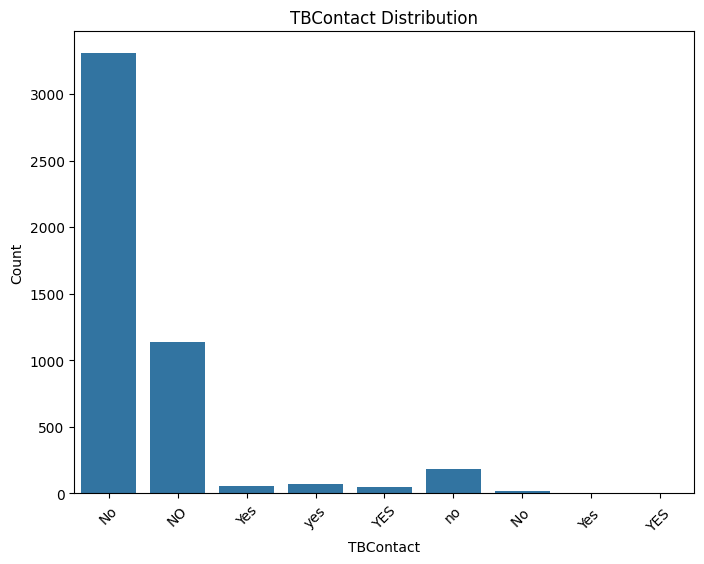

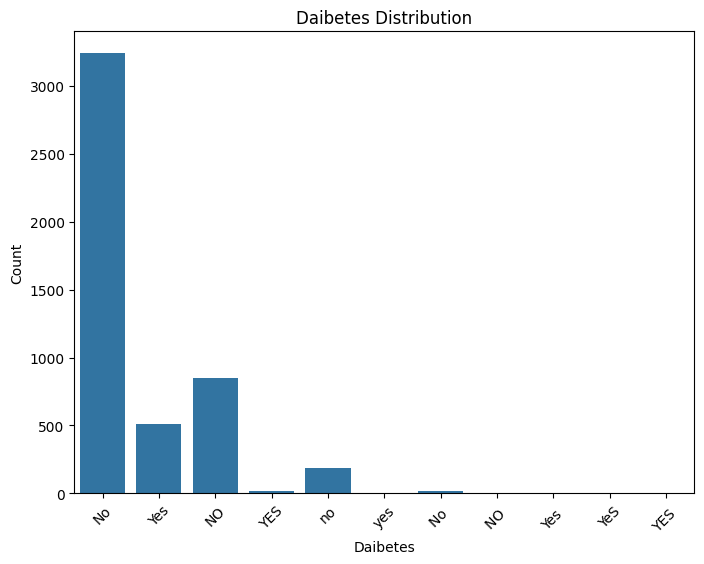

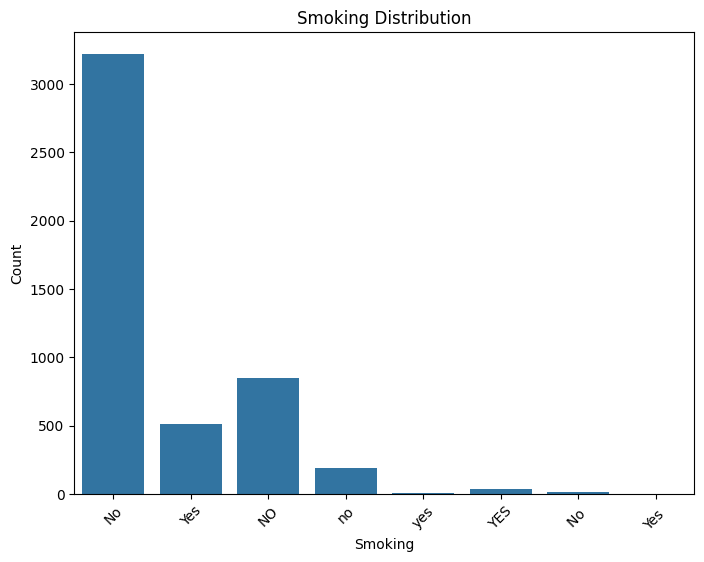

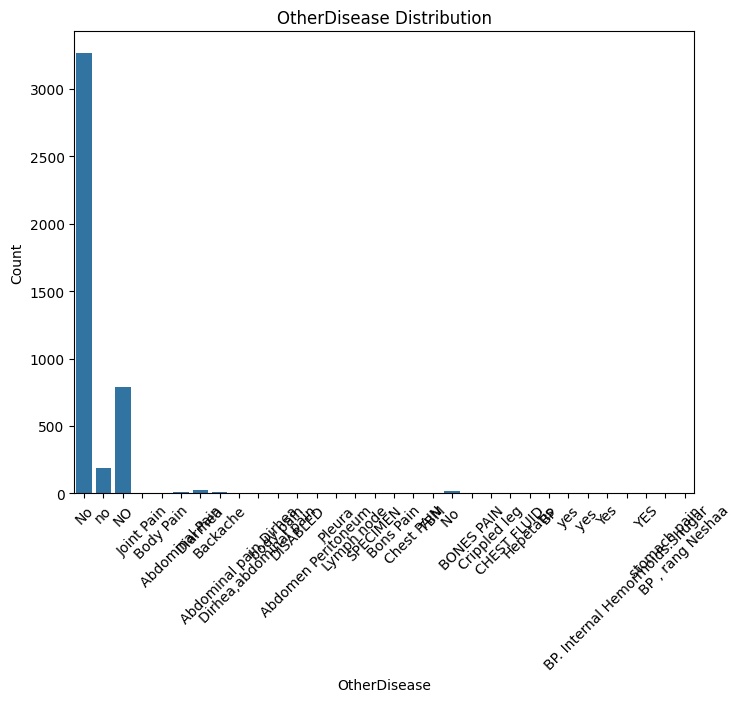

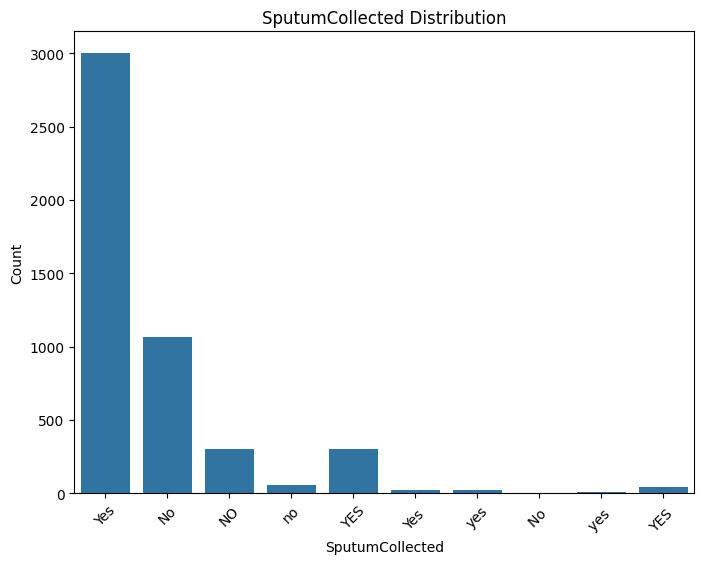

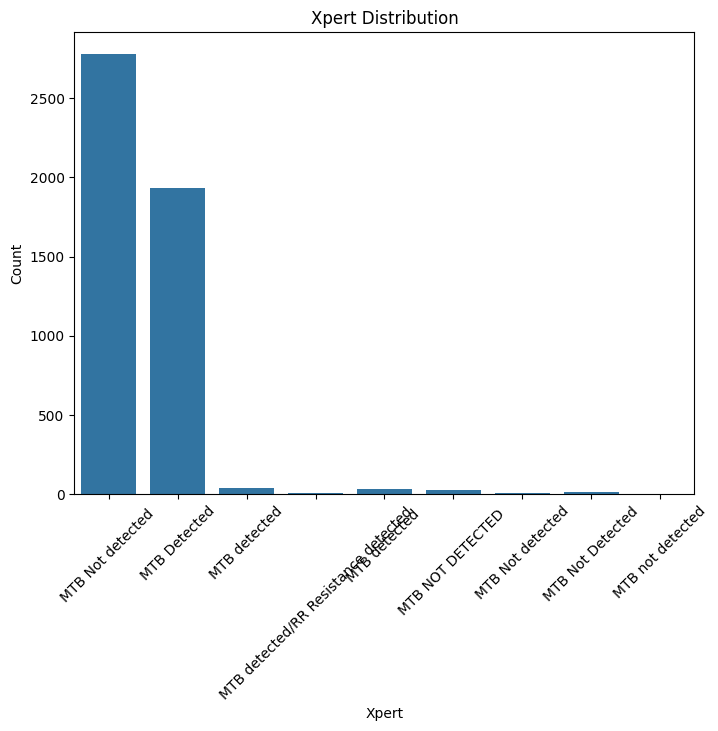

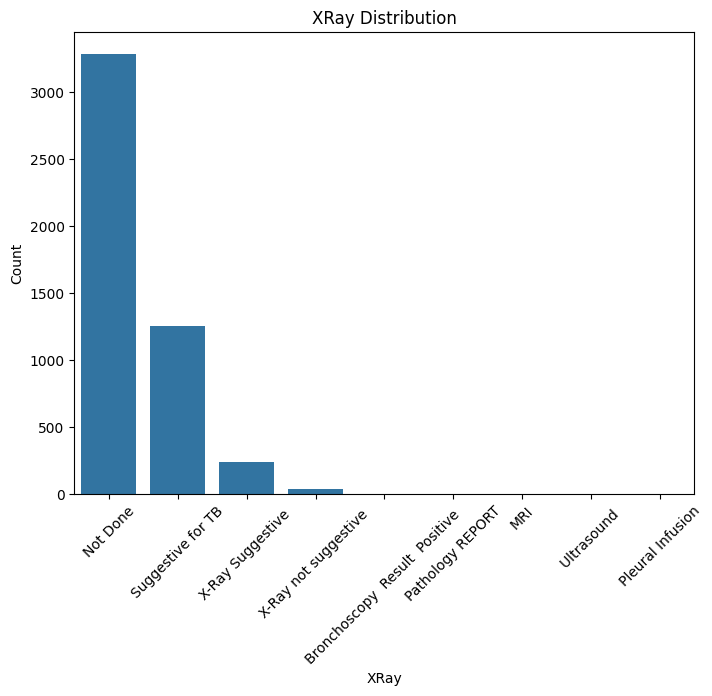

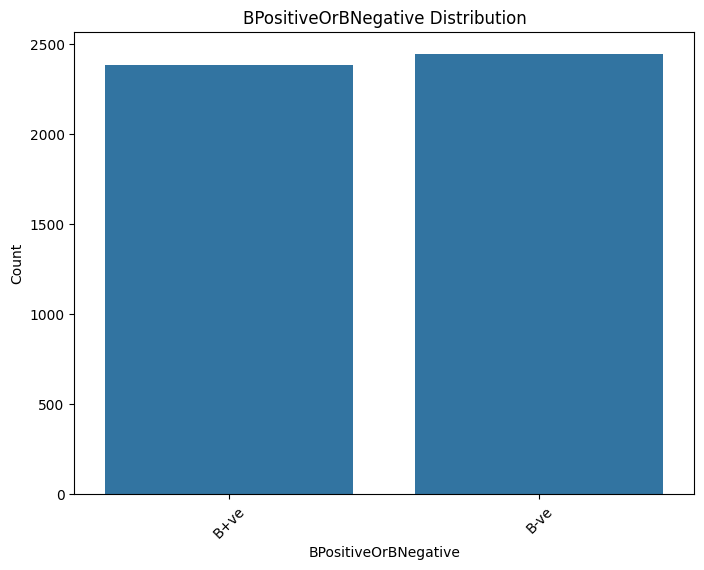

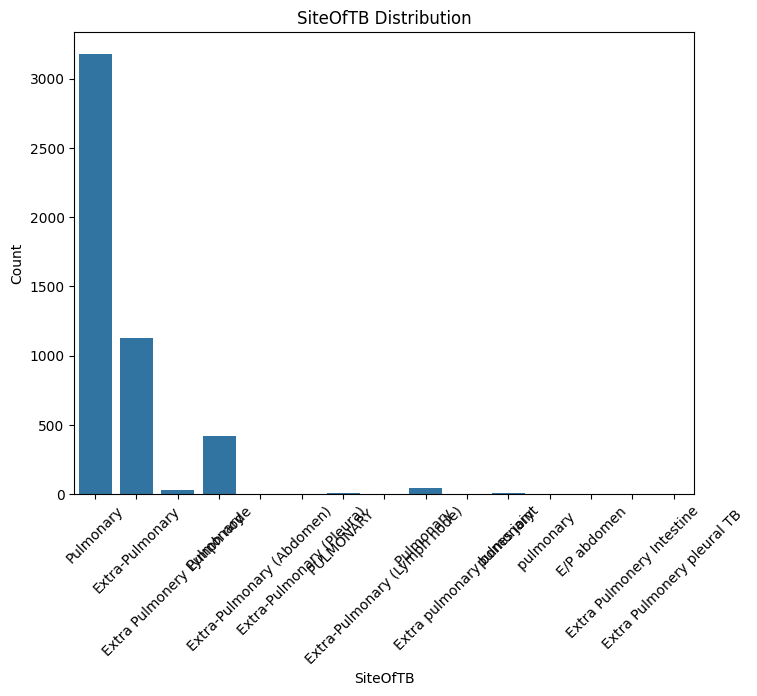

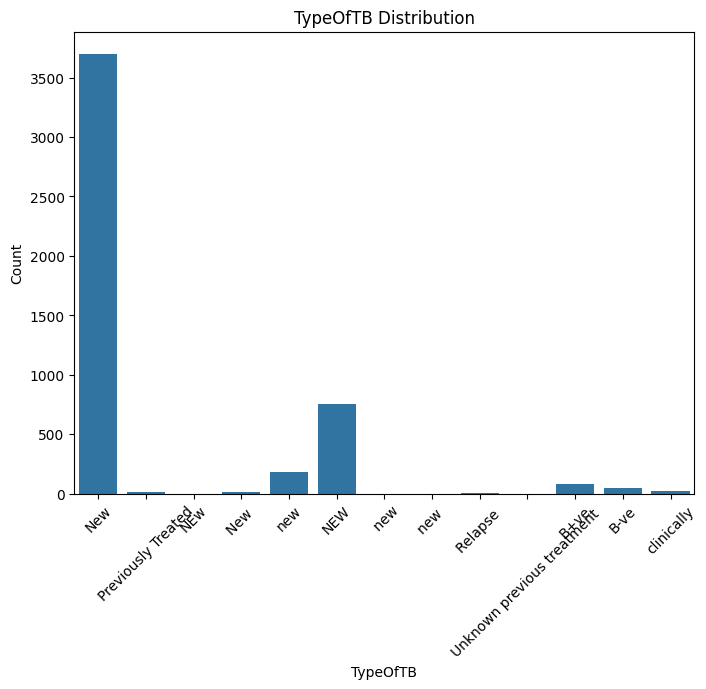

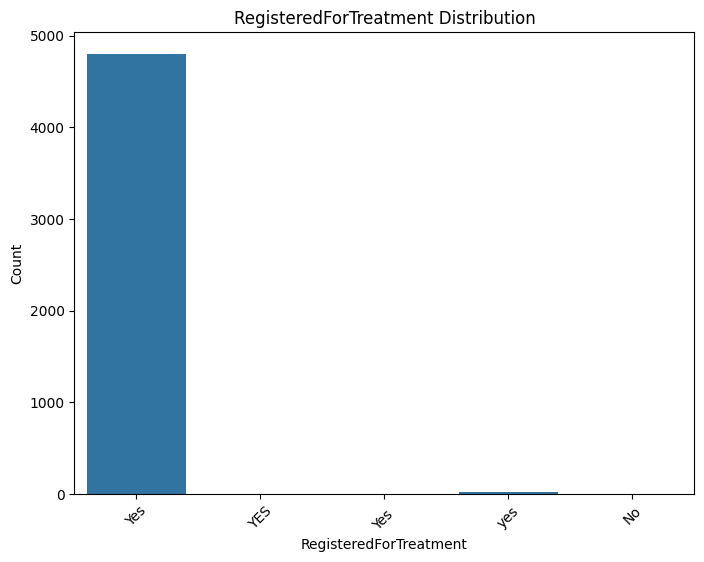

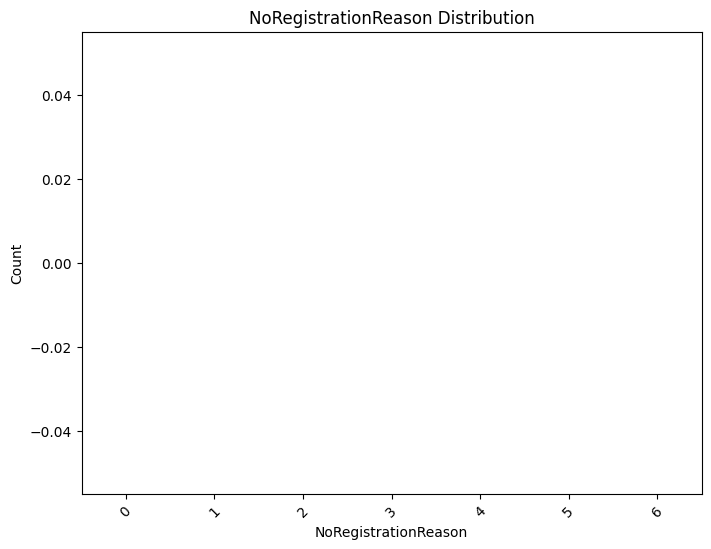

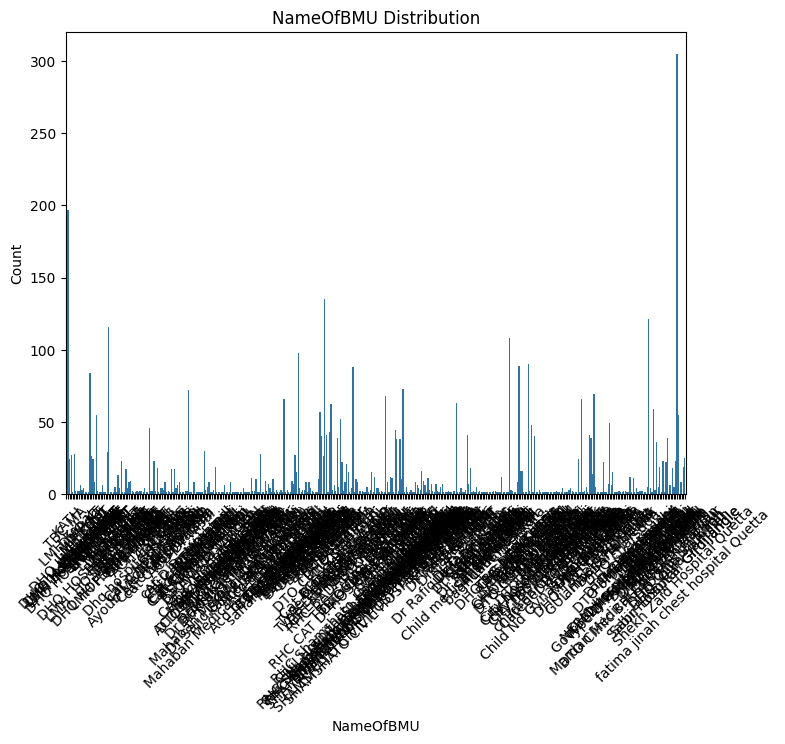

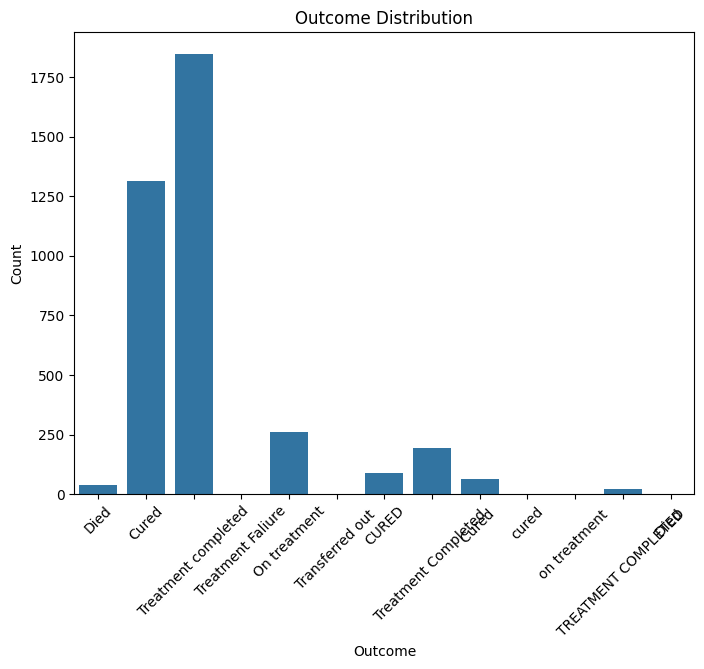

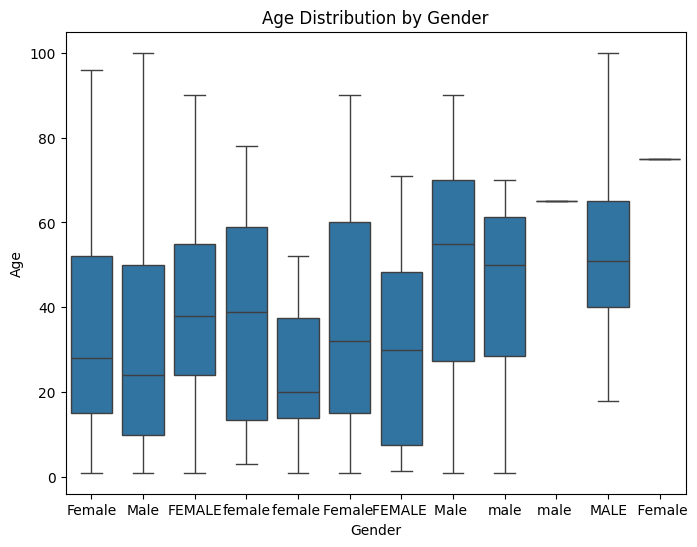

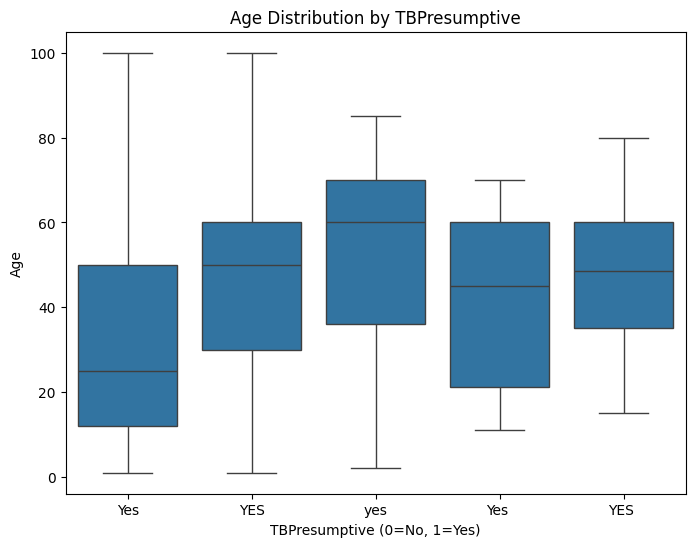

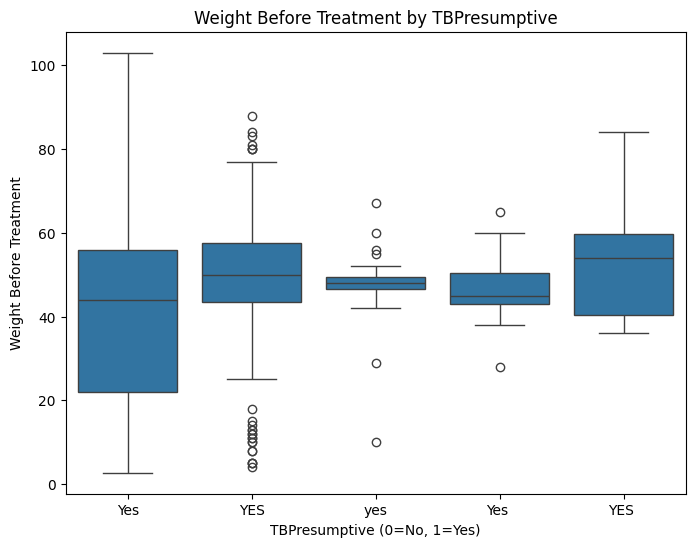

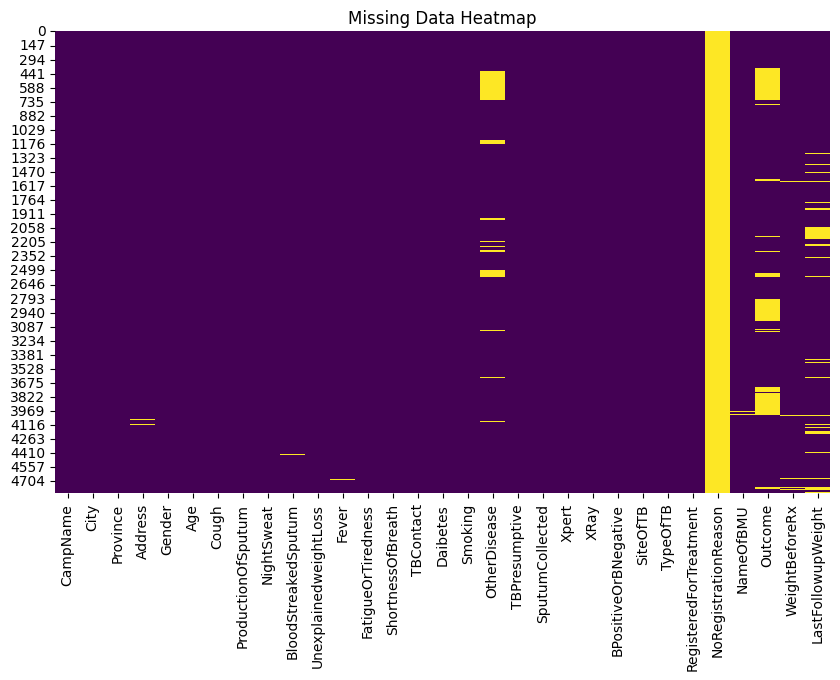

TBPresumptive
Yes     3442
YES      346
YES       35
yes       23
Yes       18
Name: count, dtype: int64


In [32]:
# Distribution of TBPresumptive
plt.figure(figsize=(6, 4))
sns.countplot(x='TBPresumptive', data=df)
plt.title('Distribution of TB Presumptive (0=No, 1=Yes)')
plt.xlabel('TBPresumptive')
plt.ylabel('Count')
plt.show()


# Plot distribution of Age
plt.figure(figsize=(8, 6))
sns.histplot(df['Age'], kde=True, bins=20)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Plot distribution of WeightBeforeRx
plt.figure(figsize=(8, 6))
sns.histplot(df['WeightBeforeRx'], kde=True, bins=20)
plt.title('Weight Before Treatment Distribution')
plt.xlabel('Weight Before Treatment')
plt.ylabel('Frequency')
plt.show()

# Plot distribution of LastFollowupWeight
plt.figure(figsize=(8, 6))
sns.histplot(df['LastFollowupWeight'], kde=True, bins=20)
plt.title('Last Follow-up Weight Distribution')
plt.xlabel('Last Follow-up Weight')
plt.ylabel('Frequency')
plt.show()

# Correlation between numerical variables
correlation_matrix = df[['Age', 'WeightBeforeRx', 'LastFollowupWeight']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix for Numerical Features')
plt.show()


# Categorical columns list
categorical_cols = ['Gender', 'Cough', 'ProductionOfSputum', 'NightSweat', 'BloodStreakedSputum',
                    'UnexplainedweightLoss', 'Fever', 'FatigueOrTiredness', 'ShortnessOfBreath',
                    'TBContact', 'Daibetes', 'Smoking', 'OtherDisease', 'SputumCollected',
                    'Xpert', 'XRay', 'BPositiveOrBNegative', 'SiteOfTB', 'TypeOfTB',
                    'RegisteredForTreatment', 'NoRegistrationReason', 'NameOfBMU', 'Outcome']

# Plot count of each categorical feature
for col in categorical_cols:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=col, data=df)
    plt.title(f'{col} Distribution')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()


# Box plot of Age against Gender
plt.figure(figsize=(8, 6))
sns.boxplot(x='Gender', y='Age', data=df)
plt.title('Age Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Age')
plt.show()

# Box plot of Age against TBPresumptive
plt.figure(figsize=(8, 6))
sns.boxplot(x='TBPresumptive', y='Age', data=df)
plt.title('Age Distribution by TBPresumptive')
plt.xlabel('TBPresumptive (0=No, 1=Yes)')
plt.ylabel('Age')
plt.show()

# Box plot of WeightBeforeRx against TBPresumptive
plt.figure(figsize=(8, 6))
sns.boxplot(x='TBPresumptive', y='WeightBeforeRx', data=df)
plt.title('Weight Before Treatment by TBPresumptive')
plt.xlabel('TBPresumptive (0=No, 1=Yes)')
plt.ylabel('Weight Before Treatment')
plt.show()



# Missing Data Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Heatmap')
plt.show()



from sklearn.model_selection import train_test_split

# Define target and features
X = df[categorical_cols + ['Age', 'WeightBeforeRx', 'LastFollowupWeight']]
y = df['TBPresumptive']

# Stratified train-test split to ensure both classes are present in training data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Check class distribution in the training set
print(y_train.value_counts())


Step 4: Data Preprocessing
Here, we handle missing values, encode categorical variables, and split the dataset into training and test sets.

In [33]:
# Step 4: Data Preprocessing with Encoding

# Handle missing values (for categorical columns)
df.fillna({
    'Cough': 'Unknown',
    'ProductionOfSputum': 'Unknown',
    'NightSweat': 'Unknown',
    'BloodStreakedSputum': 'Unknown',
    'UnexplainedweightLoss': 'Unknown',
    'Fever': 'Unknown',
    'FatigueOrTiredness': 'Unknown',
    'ShortnessOfBreath': 'Unknown',
    'TBContact': 'Unknown',
    'Daibetes': 'Unknown',
    'Smoking': 'Unknown',
    'OtherDisease': 'Unknown',
    'SputumCollected': 'Unknown',
    'Xpert': 'Unknown',
    'XRay': 'Unknown',
    'BPositiveOrBNegative': 'Unknown',
    'SiteOfTB': 'Unknown',
    'TypeOfTB': 'Unknown',
    'RegisteredForTreatment': 'Unknown',
    'NoRegistrationReason': 'Unknown'}, inplace=True)

# Handle numerical missing values
df['WeightBeforeRx'].fillna(df['WeightBeforeRx'].median(), inplace=True)
df['LastFollowupWeight'].fillna(df['LastFollowupWeight'].median(), inplace=True)

# Convert 'TBPresumptive' to binary: 'Yes' -> 1, 'No' -> 0
df['TBPresumptive'] = df['TBPresumptive'].map({'Yes': 1, 'No': 0})

# Handle missing values in the target variable
df = df.dropna(subset=['TBPresumptive'])

# Convert 'Age' to numeric
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')

# Define categorical and numerical columns
categorical_cols = ['Gender', 'Cough', 'ProductionOfSputum', 'NightSweat', 'BloodStreakedSputum',
                    'UnexplainedweightLoss', 'Fever', 'FatigueOrTiredness', 'ShortnessOfBreath', 'TBContact',
                    'Daibetes', 'Smoking', 'OtherDisease', 'SputumCollected', 'Xpert', 'XRay',
                    'BPositiveOrBNegative', 'SiteOfTB', 'TypeOfTB', 'RegisteredForTreatment',
                    'NoRegistrationReason', 'NameOfBMU', 'Outcome']

numerical_cols = ['Age', 'WeightBeforeRx', 'LastFollowupWeight']

# Define target variable
target = 'TBPresumptive'

# Split the data into features (X) and target variable (y)
X = df[categorical_cols + numerical_cols]
y = df[target]

# Step 5: Stratified train-test split to ensure both classes are present
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Check class distribution in training data
print("Class distribution in the training set after stratified split:")
print(y_train.value_counts())


Class distribution in the training set after stratified split:
TBPresumptive
1.0    3442
Name: count, dtype: int64
